# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
print(df.columns.values)

['survived' 'pclass' 'sex' 'age' 'sibsp' 'parch' 'fare' 'embarked' 'class'
 'who' 'adult_male' 'deck' 'embark_town' 'alive' 'alone']


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.shape

(891, 15)

In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
mean_ages = df.groupby(['sex','pclass'])['age'].mean()
display(mean_ages)

sex     pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: age, dtype: float64

In [25]:
def replace_nan_age(row):
    if pd.isnull(row['age']):
        return mean_ages[row['sex'], row['pclass']]
    else:
        return row['age']
    
df['age'] = df.apply(replace_nan_age, axis=1)
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
age_bin          0
dtype: int64

# Data Visualization

Scatterplot for multiple variable using seaborn: sns.lmplot()

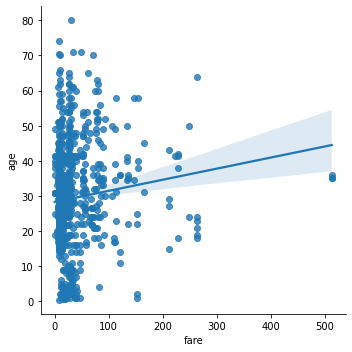

In [10]:
sns.lmplot(data=df, x="fare", y="age")

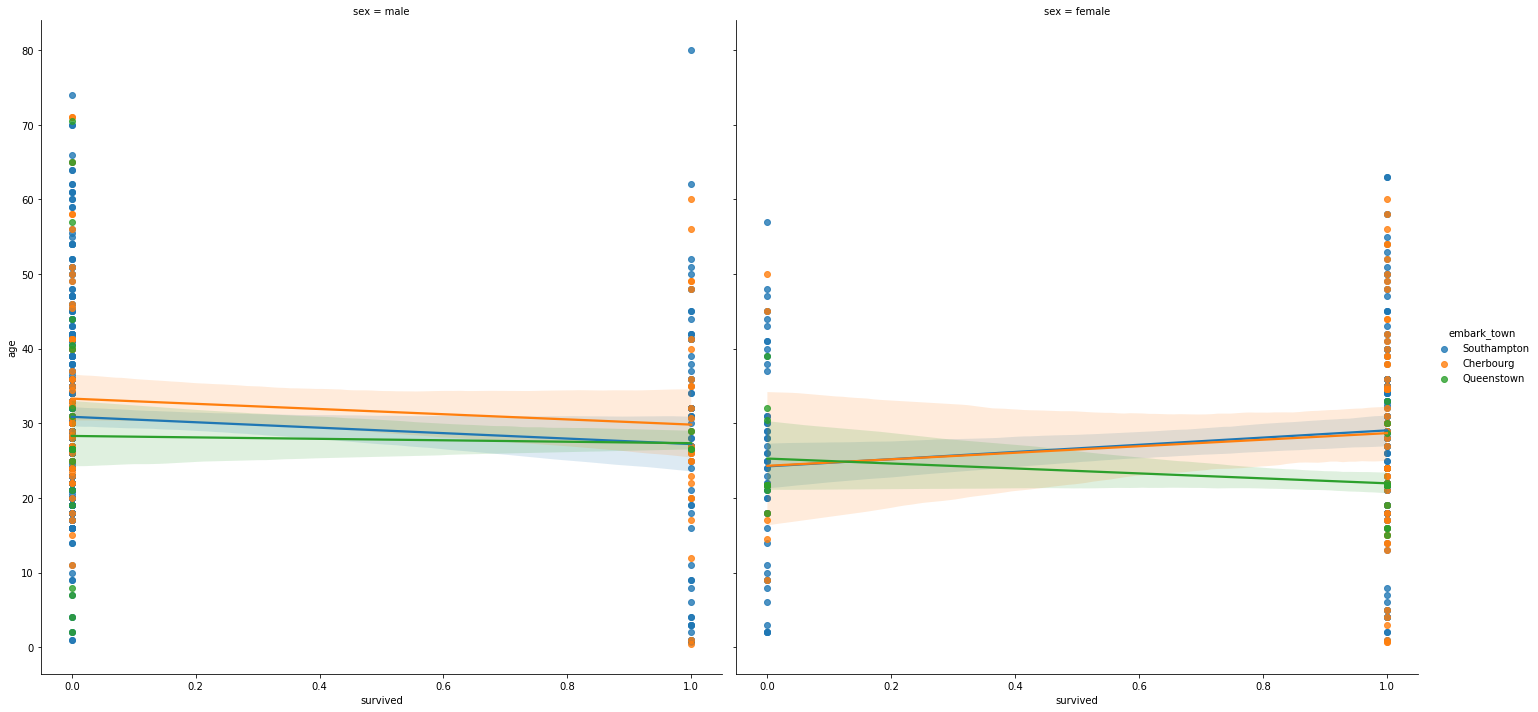

In [11]:
sns.lmplot(data=df, x="survived", y="age",hue="embark_town", col="sex", height=10,)

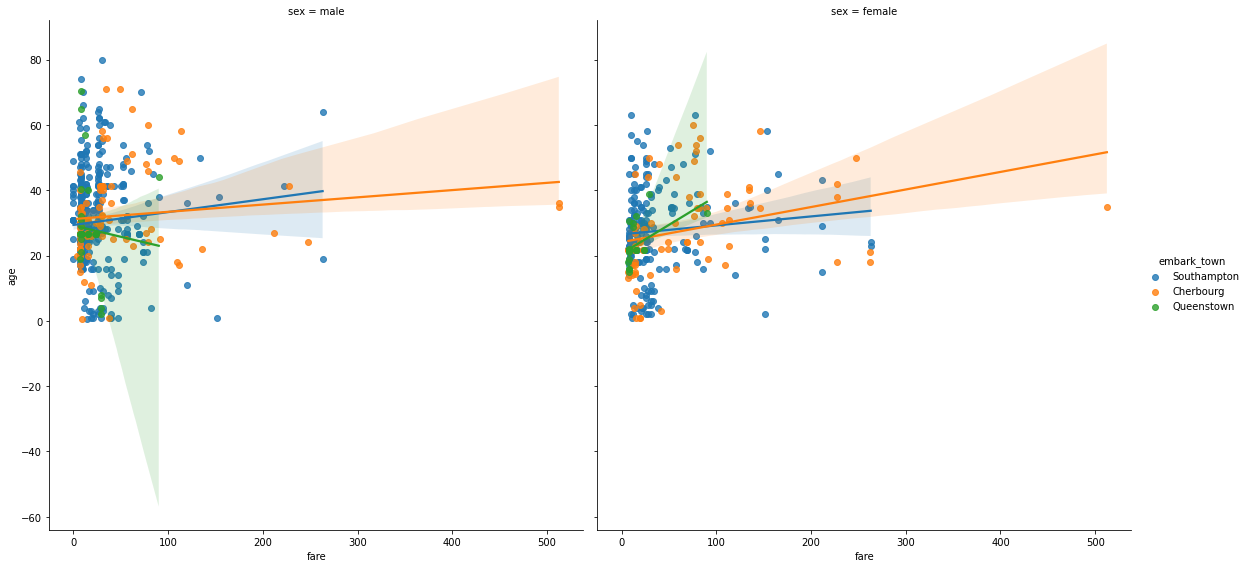

In [12]:
sns.lmplot(data=df, x="fare", y="age",hue="embark_town", col="sex", height=8,)

Bar plot between two variable using sns.countplot()

<AxesSubplot:xlabel='class', ylabel='count'>

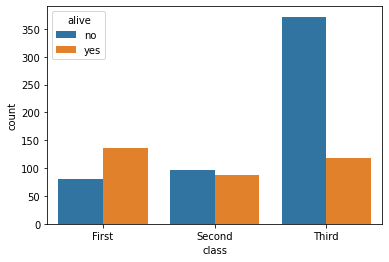

In [13]:
sns.countplot(data=df, x="class", hue="alive")

Write a code to check how the price of the ticket (column name: 'fare') for each passenger is distributed by plotting a histogram

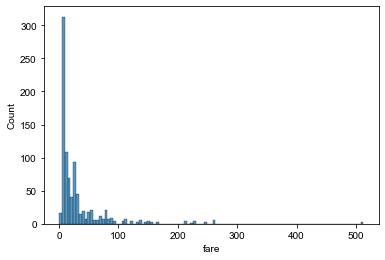

In [14]:
sns.histplot(x='fare',data=df)
sns.set(rc={'figure.figsize':(40,10)})

Histogram for age, fare, etc using sns.distplot()

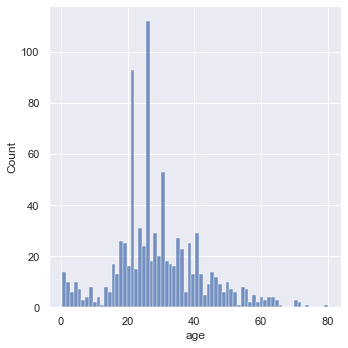

In [15]:
sns.displot(x='age',data=df,bins=70)
sns.set(rc={'figure.figsize':(10,10)})

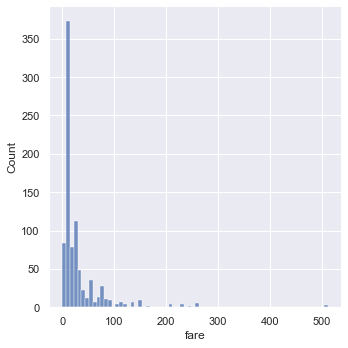

In [16]:
sns.displot(x='fare',data=df,bins=70)
sns.set(rc={'figure.figsize':(10,10)})

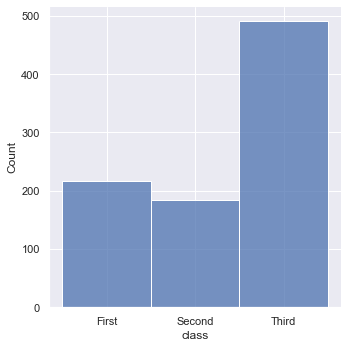

In [17]:
sns.displot(x='class',data=df,bins=70)
sns.set(rc={'figure.figsize':(10,10)})

Draw bar plot for survival rate of different age bands(groups)

<AxesSubplot:xlabel='sex', ylabel='age'>

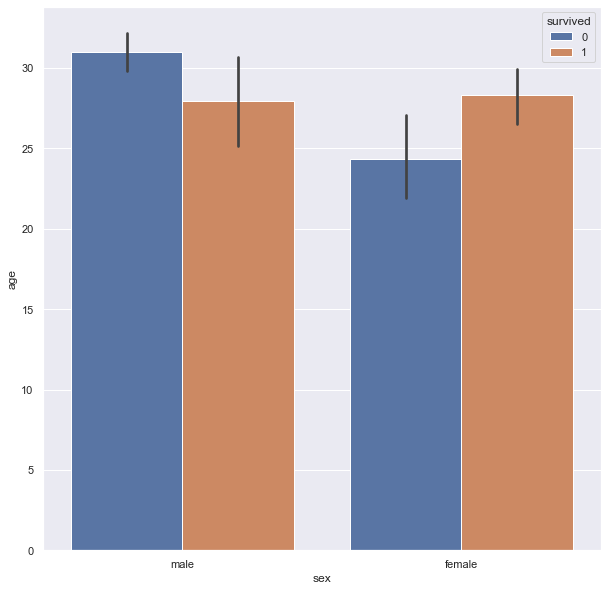

In [18]:
sns.barplot(x='sex', y='age', data=df, hue="survived")

In [19]:
min_value = df['age'].min()
max_value = df['age'].max()
print(min_value)
print(max_value)

0.42
80.0


In [20]:
df['age'].value_counts(bins = 4, sort = True)

(20.315, 40.21]    541
(0.339, 20.315]    179
(40.21, 60.105]    149
(60.105, 80.0]      22
Name: age, dtype: int64

In [21]:
df.age.value_counts()

26.507589    94
21.750000    42
24.000000    30
22.000000    27
18.000000    26
             ..
14.500000     1
70.500000     1
12.000000     1
36.500000     1
74.000000     1
Name: age, Length: 94, dtype: int64

In [22]:
bins = np.linspace(min_value, max_value, 5)

In [23]:
df["age_bin"] = pd.cut(df["age"], bins, labels=["child","teen", "adult", "old"], include_lowest = True)

<AxesSubplot:xlabel='age_bin', ylabel='survived'>

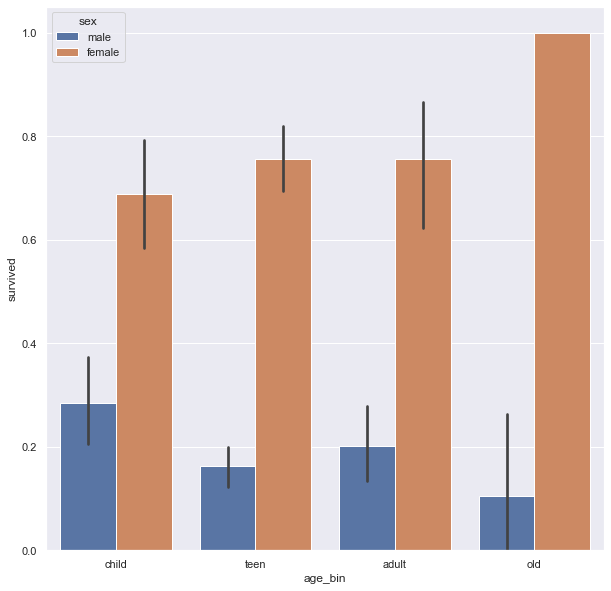

In [24]:
sns.barplot(x='age_bin', y='survived', data=df , hue="sex")